# Data Wrangling:- We Rate Dogs
   #### A.  Gathering data 
   #### B.  Assessing data
   #### C.  leaning data

###### import libraries

In [1]:
# start with importing libraries 
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import datetime
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



## A. Gather Data : 1. twitter-archive-enhanced.csv

In [2]:
#Read CSV file 
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df_twitter_archive.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## A. Gather Data : 2. image prediction
URL downloaded programatically


In [5]:
# download the image predictions file with the provided link
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [6]:
images_data = url.split('/')[-1]

with open(os.path.join('./', images_data), mode = 'wb') as file:
    file.write(response.content)

In [7]:
#read file_images 
df_images = pd.read_csv(images_data, sep = '\\t', engine = 'python')
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## A. Gather Data : 3. Download Tweet JSON Data


In [9]:
# access

consumer_key = '8wOAdbDC1gwPyPmXg26tdnBcY'
consumer_secret = 'MJuBibJj04udRiTQmorVC0RmNOIM4y4f55UchgOhm3Cz5lNoug'
access_token = '1562280386-TfpIZVnYll9tG62j76Ya1J3rhXVwD67CQjbKVIi'
access_secret = 'ET9PvVqPW4O3XB30GbvLfSUqMruhAkY3VDMnIujnqfbvl'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [10]:
# downloading with the Twitter API
tweet_ids = df_twitter_archive.tweet_id.values
print("# of tweet_ids: " + str(len(tweet_ids)) + "\n")

count = 0
tweet_json_list = []
fails_dict = {}

start_time = time.time()

for tweet_id in tweet_ids:
    count += 1
    try:
        # attempt to get the tweet's JSON data and append to the tweet JSON list
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_json_list.append(tweet._json)
    except tweepy.TweepError as err:
        # save the error to the fail dictionary for review
        print("TweepError for id:  " + str(tweet_id))
        fails_dict[tweet_id] = err
        pass
    # To save space, only print out loop/tweet id for every 100th tweet
    if count % 100 == 0:
        print("loop # " + str(count))

elapsed_time = time.time() - start_time

elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print("\nTime elapsed (HH:MM:SS):  " + elapsed_time_str + "\n")

# display list of tweets with errors
print("Number of TweepErrors:  {}\n".format(len(fails_dict)))
for tweet_id in fails_dict:
    print(tweet_id, fails_dict[tweet_id])

# of tweet_ids: 2356

TweepError for id:  888202515573088257
TweepError for id:  873697596434513921
loop # 100
TweepError for id:  872668790621863937
TweepError for id:  872261713294495745
TweepError for id:  869988702071779329
TweepError for id:  866816280283807744
TweepError for id:  861769973181624320
TweepError for id:  856602993587888130
loop # 200
TweepError for id:  851953902622658560
TweepError for id:  845459076796616705
TweepError for id:  844704788403113984
TweepError for id:  842892208864923648
TweepError for id:  837366284874571778
TweepError for id:  837012587749474308
loop # 300
TweepError for id:  829374341691346946
TweepError for id:  827228250799742977
loop # 400
loop # 500
TweepError for id:  812747805718642688
TweepError for id:  802247111496568832
loop # 600
loop # 700
TweepError for id:  779123168116150273
TweepError for id:  775096608509886464
loop # 800
TweepError for id:  771004394259247104
TweepError for id:  770743923962707968
TweepError for id:  759566828574

TweepError for id:  738402415918125056
TweepError for id:  738184450748633089
TweepError for id:  738166403467907072
TweepError for id:  738156290900254721
TweepError for id:  737826014890496000
TweepError for id:  737800304142471168
TweepError for id:  737678689543020544
TweepError for id:  737445876994609152
TweepError for id:  737322739594330112
TweepError for id:  737310737551491075
TweepError for id:  736736130620620800
TweepError for id:  736392552031657984
TweepError for id:  736365877722001409
TweepError for id:  736225175608430592
TweepError for id:  736010884653420544
TweepError for id:  735991953473572864
loop # 1100
TweepError for id:  735648611367784448
TweepError for id:  735635087207878657
TweepError for id:  735274964362878976
TweepError for id:  735256018284875776
TweepError for id:  735137028879360001
TweepError for id:  734912297295085568
TweepError for id:  734787690684657664
TweepError for id:  734776360183431168
TweepError for id:  734559631394082816
TweepError fo

TweepError for id:  707983188426153984
TweepError for id:  707969809498152960
TweepError for id:  707776935007539200
TweepError for id:  707741517457260545
TweepError for id:  707738799544082433
loop # 1300
TweepError for id:  707693576495472641
TweepError for id:  707629649552134146
TweepError for id:  707610948723478529
TweepError for id:  707420581654872064
TweepError for id:  707411934438625280
TweepError for id:  707387676719185920
TweepError for id:  707377100785885184
TweepError for id:  707315916783140866
TweepError for id:  707297311098011648
TweepError for id:  707059547140169728
TweepError for id:  707038192327901184
TweepError for id:  707021089608753152
TweepError for id:  707014260413456384
TweepError for id:  706904523814649856
TweepError for id:  706901761596989440
TweepError for id:  706681918348251136
TweepError for id:  706644897839910912
TweepError for id:  706593038911545345
TweepError for id:  706538006853918722
TweepError for id:  706516534877929472
TweepError fo

TweepError for id:  691793053716221953
TweepError for id:  691756958957883396
TweepError for id:  691675652215414786
TweepError for id:  691483041324204033
TweepError for id:  691459709405118465
TweepError for id:  691444869282295808
TweepError for id:  691416866452082688
TweepError for id:  691321916024623104
TweepError for id:  691096613310316544
TweepError for id:  691090071332753408
TweepError for id:  690989312272396288
TweepError for id:  690959652130045952
TweepError for id:  690938899477221376
TweepError for id:  690932576555528194
TweepError for id:  690735892932222976
TweepError for id:  690728923253055490
TweepError for id:  690690673629138944
TweepError for id:  690649993829576704
TweepError for id:  690607260360429569
TweepError for id:  690597161306841088
TweepError for id:  690400367696297985
TweepError for id:  690374419777196032
TweepError for id:  690360449368465409
TweepError for id:  690348396616552449
TweepError for id:  690248561355657216
TweepError for id:  69002

TweepError for id:  680221482581123072
TweepError for id:  680206703334408192
TweepError for id:  680191257256136705
TweepError for id:  680176173301628928
TweepError for id:  680161097740095489
TweepError for id:  680145970311643136
TweepError for id:  680130881361686529
TweepError for id:  680115823365742593
TweepError for id:  680100725817409536
TweepError for id:  680085611152338944
TweepError for id:  680070545539371008
TweepError for id:  680055455951884288
TweepError for id:  679877062409191424
TweepError for id:  679872969355714560
TweepError for id:  679862121895714818
TweepError for id:  679854723806179328
TweepError for id:  679844490799091713
TweepError for id:  679828447187857408
TweepError for id:  679777920601223168
TweepError for id:  679736210798047232
TweepError for id:  679729593985699840
TweepError for id:  679722016581222400
TweepError for id:  679530280114372609
TweepError for id:  679527802031484928
TweepError for id:  679511351870550016
TweepError for id:  67950

TweepError for id:  674053186244734976
TweepError for id:  674051556661161984
TweepError for id:  674045139690631169
TweepError for id:  674042553264685056
TweepError for id:  674038233588723717
TweepError for id:  674036086168010753
TweepError for id:  674024893172875264
TweepError for id:  674019345211760640
TweepError for id:  674014384960745472
TweepError for id:  674008982932058114
TweepError for id:  673956914389192708
TweepError for id:  673919437611909120
TweepError for id:  673906403526995968
TweepError for id:  673887867907739649
TweepError for id:  673716320723169284
TweepError for id:  673715861853720576
TweepError for id:  673711475735838725
TweepError for id:  673709992831262724
TweepError for id:  673708611235921920
TweepError for id:  673707060090052608
TweepError for id:  673705679337693185
TweepError for id:  673700254269775872
TweepError for id:  673697980713705472
TweepError for id:  673689733134946305
TweepError for id:  673688752737402881
TweepError for id:  67368

TweepError for id:  670055038660800512
TweepError for id:  670046952931721218
TweepError for id:  670040295598354432
TweepError for id:  670037189829525505
TweepError for id:  670003130994700288
TweepError for id:  669993076832759809
TweepError for id:  669972011175813120
TweepError for id:  669970042633789440
TweepError for id:  669942763794931712
TweepError for id:  669926384437997569
TweepError for id:  669923323644657664
TweepError for id:  669753178989142016
TweepError for id:  669749430875258880
TweepError for id:  669684865554620416
TweepError for id:  669683899023405056
TweepError for id:  669682095984410625
TweepError for id:  669680153564442624
TweepError for id:  669661792646373376
TweepError for id:  669625907762618368
TweepError for id:  669603084620980224
TweepError for id:  669597912108789760
TweepError for id:  669583744538451968
TweepError for id:  669573570759163904
TweepError for id:  669571471778410496
TweepError for id:  669567591774625800
TweepError for id:  66956

TweepError for id:  666057090499244032
TweepError for id:  666055525042405380
TweepError for id:  666051853826850816
TweepError for id:  666050758794694657
TweepError for id:  666049248165822465
TweepError for id:  666044226329800704
TweepError for id:  666033412701032449
TweepError for id:  666029285002620928
TweepError for id:  666020888022790149

Time elapsed (HH:MM:SS):  00:06:21

Number of TweepErrors:  1479

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 [{'code': 

670303360680108032 [{'message': 'Rate limit exceeded', 'code': 88}]
670290420111441920 [{'message': 'Rate limit exceeded', 'code': 88}]
670093938074779648 [{'message': 'Rate limit exceeded', 'code': 88}]
670086499208155136 [{'message': 'Rate limit exceeded', 'code': 88}]
670079681849372674 [{'message': 'Rate limit exceeded', 'code': 88}]
670073503555706880 [{'message': 'Rate limit exceeded', 'code': 88}]
670069087419133954 [{'message': 'Rate limit exceeded', 'code': 88}]
670061506722140161 [{'message': 'Rate limit exceeded', 'code': 88}]
670055038660800512 [{'message': 'Rate limit exceeded', 'code': 88}]
670046952931721218 [{'message': 'Rate limit exceeded', 'code': 88}]
670040295598354432 [{'message': 'Rate limit exceeded', 'code': 88}]
670037189829525505 [{'message': 'Rate limit exceeded', 'code': 88}]
670003130994700288 [{'message': 'Rate limit exceeded', 'code': 88}]
669993076832759809 [{'message': 'Rate limit exceeded', 'code': 88}]
669972011175813120 [{'message': 'Rate limit exce

In [11]:
#Save JSON data to file
tweet_json_file = 'tweet_json.txt'
with open(tweet_json_file, 'w') as outfile:
    for tweet_json in tweet_json_list:
        json.dump(tweet_json, outfile)
        outfile.write('\n')

In [12]:
# read
tweet_json_data = []

with open(tweet_json_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
df_tweet_data_extra = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

df_tweet_data_extra.head(30)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7525,35559
1,892177421306343426,5585,30753
2,891815181378084864,3702,23133
3,891689557279858688,7710,38842
4,891327558926688256,8309,37129
5,891087950875897856,2787,18726
6,890971913173991426,1809,10872
7,890729181411237888,16844,59944
8,890609185150312448,3841,25739
9,890240255349198849,6547,29395


In [13]:
df_tweet_data_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 3 columns):
tweet_id          877 non-null int64
retweet_count     877 non-null int64
favorite_count    877 non-null int64
dtypes: int64(3)
memory usage: 20.6 KB


In [14]:
df_tweet_data_extra.to_csv('tweet_data_extra.csv', index = False)

## B. Assess Data

#### The quality of data is assessed against dimensions or criteria concerning the content: completeness, validity, accuracy and consistency.

#### Tidiness of data is assessed with regard to structure according to the rules defined by Hadley Wikham.

In [15]:
# Load the data gathered data files
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\\t', engine = 'python')
tweet_data = pd.read_csv('tweet_data_extra.csv')

## B. Assess Data :- 1. twitter-archive-enhanced

In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
sum(twitter_archive.duplicated())

0

In [18]:
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [19]:
twitter_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


## Quality:

The timestamp column has dates in string form.
Some of the rows from the tail() output above have invalid strings in the name column,
e.g. "a", "an", "in". These words are all the 3rd word in the tweet.Values of "None" in the name column.


## Tidiness:

The columns with numerical data that are typically used for analysis are located to the far right of the table, 
and the columns with long strings are on the left; this makes it difficult to readily see the data 
that will be used for analyses.

In [20]:
twitter_archive.name.value_counts().head(50)

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
the           8
Sadie         8
an            7
Bailey        7
Toby          7
Daisy         7
Buddy         7
Scout         6
Leo           6
Oscar         6
Dave          6
Rusty         6
Jack          6
Jax           6
Milo          6
Bella         6
Stanley       6
Koda          6
George        5
Finn          5
Sammy         5
Chester       5
Gus           5
very          5
Sunny         5
Alfie         5
Louis         5
Bentley       5
Larry         5
Oakley        5
Phil          5
Cassie        4
Jeffrey       4
Dexter        4
Reginald      4
just          4
Boomer        4
Brody         4
Hank          4
Name: name, dtype: int64

In [21]:
# list all names that are NOT capitalized
err_names_mask = twitter_archive.name.str.contains('^[a-z]', regex = True)
twitter_archive[err_names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [22]:
# number of tweets with missing urls
sum(twitter_archive.expanded_urls.isna())

59

In [23]:
# how many tweets with missing urls are replies or retweets?
sum(twitter_archive.expanded_urls.isna() & \
    (twitter_archive.in_reply_to_status_id.notnull() | \
     twitter_archive.retweeted_status_id.notnull()))

56

In [24]:
# display tweets that are missing urls, and are NOT replies and are NOT retweets
mask = twitter_archive.expanded_urls.isna() & \
       twitter_archive.in_reply_to_status_id.isna() & \
       twitter_archive.retweeted_status_id.isna()
twitter_archive[mask][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


In [25]:
# are any of these tweets in the predictions table?
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = image_predictions.tweet_id.isin(tweet_set)
sum(find_tweet_id)

0

In [26]:
twitter_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [27]:
sum(twitter_archive.rating_denominator != 10)

23

In [28]:
mask_find = (twitter_archive.rating_denominator != 10) & \
            twitter_archive.in_reply_to_status_id.isna() & \
            twitter_archive.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
twitter_archive[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,24,7
902,Why does this never happen at my front door......,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She ...",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved sq...,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #Final...,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very pre...,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",709198395643068416,45,50


In [29]:
sum(mask_find)

17

In [30]:
twitter_archive.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [31]:
sum(twitter_archive.rating_numerator >= 15)

28

## NOTES:

The output above shows ALL the rating_numerator values, showing a count of 28 tweets with numerator >= 15. Next, 
looking at ONLY those ratings with denominators = 10, the results are as follows:

In [33]:
df_tweets_denom_10 = twitter_archive[twitter_archive.rating_denominator == 10]
df_tweets_denom_10.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
666       1
420       2
182       1
75        2
27        1
26        1
17        1
15        2
14       54
13      351
12      558
11      463
10      461
9       156
8       102
7        54
6        32
5        37
4        15
3        19
2         9
1         8
0         2
Name: rating_numerator, dtype: int64

In [34]:
sum(df_tweets_denom_10.rating_numerator >= 15)

12

In [35]:
# display tweets with numerator >= 15 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (twitter_archive.rating_denominator == 10) & \
            (twitter_archive.rating_numerator >= 15) & \
            twitter_archive.in_reply_to_status_id.isna() & \
            twitter_archive.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
twitter_archive[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly...",786709082849828864,75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,778027034220126208,27,10
979,This is Atticus. He's quite simply America af....,749981277374128128,1776,10
1712,Here we have uncovered an entire battalion of ...,680494726643068929,26,10
2074,After so many requests... here you go.\n\nGood...,670842764863651840,420,10


In [36]:
# display tweets with numerator = 0 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (twitter_archive.rating_denominator == 10) & \
            (twitter_archive.rating_numerator == 0) & \
            twitter_archive.in_reply_to_status_id.isna() & \
            twitter_archive.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
twitter_archive[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plag...,835152434251116546,0,10


In [37]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Note 
There are only 4 types of sources, and they can be simplified by using the display string portion 
just before the final "<\a>":

Twitter for iPhone
Vine - Make a Scene
Twitter Web Client
TweetDeck

#### doggo, floofer, pupper, and puppo

In [38]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [39]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [40]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [41]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [42]:
twitter_archive[twitter_archive.floofer == 'floofer'].text

46      Meet Grizzwald. He may be the floofiest floofe...
200     At first I thought this was a shy doggo, but i...
582     This is Doc. He takes time out of every day to...
774     Atlas rolled around in some chalk and now he's...
984     This is Blu. He's a wild bush Floofer. I wish ...
1022    Here's a golden floofer helping with the groce...
1091    Just wanted to share this super rare Rainbow F...
1110    This is Moose. He's a Polynesian Floofer. Dapp...
1534    Here we are witnessing a rare High Stepping Al...
1614    Say hello to Petrick. He's an Altostratus Floo...
Name: text, dtype: object

## B. Assess Data :- 2. image prediction

In [43]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [44]:
image_predictions.head(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False


In [45]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [46]:
image_predictions.p2_dog.value_counts()


True     1553
False     522
Name: p2_dog, dtype: int64

In [47]:
image_predictions.p3_dog.value_counts()


True     1499
False     576
Name: p3_dog, dtype: int64

In [48]:
## check out 20 of the entries that don't predict dogs

image_predictions[~image_predictions.p1_dog & \
               ~image_predictions.p2_dog & \
               ~image_predictions.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head(7)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False
29,666411507551481857,coho,False,barracouta,False,gar,False
45,666786068205871104,snail,False,slug,False,acorn,False


In [49]:
sum(~image_predictions.p1_dog & \
    ~image_predictions.p2_dog & \
    ~image_predictions.p3_dog)

324

## B. Assess Data :- 3. tweet_data

In [50]:
tweet_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 3 columns):
tweet_id          877 non-null int64
retweet_count     877 non-null int64
favorite_count    877 non-null int64
dtypes: int64(3)
memory usage: 20.6 KB


In [51]:
tweet_data.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,7525,35559
1,892177421306343426,5585,30753
2,891815181378084864,3702,23133
3,891689557279858688,7710,38842
4,891327558926688256,8309,37129


In [52]:
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,8.770000e+02,877.000000,877.000000
mean,8.200861e+17,4645.722919,13636.182440
std,3.693118e+16,5230.610224,14328.163045
min,7.588287e+17,1.000000,0.000000
25%,7.895309e+17,1937.000000,5150.000000
50%,8.185365e+17,3182.000000,10399.000000
75%,8.482137e+17,5452.000000,19148.000000
max,8.924206e+17,55432.000000,130824.000000


Assessment Summary :- 
---------------------------------------------------------------
    Quality 1.archive :- 
       1. 181 retweets
       2. 78 reply tweets
       3. 2297 tweets with expanded_urls
       4. timestamp column is in string format
       5. NOT a valid name 109 tweets 
       6. There are 775 tweets with the dog name as "None". 
       7. 17 tweets with rating_denominator NOT equal to 10
       8. Ignoring replies and retweets, there are 17 tweets with rating_denominator NOT equal to 10
-----------------------------------------------------------------
    Quality 2.image prediction :- 
        2075 image predictions, 281 less than
-----------------------------------------------------------------
    Quality 3.Json :- 
        TweepErrors
          ==============================================
    tidiness 1.archive:-
        1. There are 4 columns for dog stages
        2. Key Points indicates
        3. rating_denominators 
    
    tidiness 2.image predictions:-
       1. p1, p2 and p3 contain the same type of data
       2.  combine the archive table as the twitter table in the tweet.
       
    
    tidiness 3.json_data
       1. combine json_data with archive table
        

    


## C. Clean Data 1.archive

In [53]:
# create copies
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

In [54]:
len_archive = twitter_archive.shape[0]; len_archive

2356

## Quality archive #1.
There are 181 retweets, and we’re only interested in “original tweets”.

#### Define
Drop all rows containing retweets, where these columns will be non-null: retweeted_status_id,
retweeted_status_user_id and retweeted_status_timestamp.

#### Code

In [55]:
sum(twitter_archive_clean.retweeted_status_id.notnull())

181

In [56]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isna()]

#### Test

In [57]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [58]:
# confirm the rows are dropped; compare with original table length
print("# of rows dropped:  {}".format(len_archive - twitter_archive_clean.shape[0]))
# reset the variable for length of the archive
len_archive = twitter_archive_clean.shape[0]

# of rows dropped:  181


### Quality archive #2.
There are 78 reply tweets; we’re only interested in “original tweets”.

#### Define
Drop all rows that are replies, those that have non-null values in these columns: in_reply_to_status_id and in_reply_to_user_id.

#### Code

In [59]:
print("# of replies:  {}".format(sum(twitter_archive_clean.in_reply_to_status_id.notnull())))

# of replies:  78


In [60]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isna()]

#### Test

In [61]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Tidiness archive #2.
All columns related to “retweets” will be empty (we're not interested in retweets).

#### Define
Since we don't want retweets, we can drop all columns related to retweets: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

#### Code

In [62]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

#### test

In [63]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Tidiness archive #3.
All columns related to “replies” will be empty (we're not interested in replies).

## Define
Drop all columns related to replies: in_reply_to_status_id and in_reply_to_user_id.

### Code

In [64]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

### Test

In [65]:
list(twitter_archive_clean)


['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Quality archive #4.
The timestamp column is in string format, it's the wrong data type.

##### Define
Convert timestamp to datetime data type.

### Code

In [66]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean['timestamp'] = twitter_archive_clean.timestamp.dt.floor('s')

#### test

In [67]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Quality archive .
The source column can be simplified by extracting and replacing with it's display string.

## Define
Replace the source string with the display portion of itself. Extract the string 

## Code

In [68]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [69]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


### test 

In [70]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [71]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Quality archive.
There are 5 tweets with rating_numerator >= 15, which either don't make sense or are huge.

## Define
Drop tweets that have rating_numerator >= 15.

## Code

In [72]:
# display numerators greater than 15
mask = twitter_archive_clean.rating_numerator >= 15
twitter_archive_clean[mask].rating_numerator.value_counts().sort_index(ascending = False)

1776    1
420     1
204     1
165     1
144     1
121     1
99      1
88      1
84      1
80      1
75      1
60      1
50      1
45      1
44      1
27      1
26      1
24      1
Name: rating_numerator, dtype: int64

In [73]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_numerator < 15]


### Test

In [75]:
# display ALL numerators
twitter_archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

14     38
13    287
12    486
11    413
10    436
9     153
8      98
7      52
6      32
5      34
4      16
3      19
2       9
1       5
0       1
Name: rating_numerator, dtype: int64

### Quality archive .
Tweets with missing data in expanded_urls (links to the tweet).

Define
Drop tweets with missing data in the expanded_urls.

Code

In [77]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2079 non-null int64
timestamp             2079 non-null datetime64[ns]
source                2079 non-null object
text                  2079 non-null object
expanded_urls         2076 non-null object
rating_numerator      2079 non-null int64
rating_denominator    2079 non-null int64
name                  2079 non-null object
doggo                 2079 non-null object
floofer               2079 non-null object
pupper                2079 non-null object
puppo                 2079 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 211.1+ KB


In [78]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]

#### test

In [79]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2076 non-null int64
timestamp             2076 non-null datetime64[ns]
source                2076 non-null object
text                  2076 non-null object
expanded_urls         2076 non-null object
rating_numerator      2076 non-null int64
rating_denominator    2076 non-null int64
name                  2076 non-null object
doggo                 2076 non-null object
floofer               2076 non-null object
pupper                2076 non-null object
puppo                 2076 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 210.8+ KB


### Tidiness archive #1.
There are 4 columns for dog stages: doggo, floofer, pupper, puppo.

##### Define
Melt the 4 columns with the dog stages:

Create a temporary column called none to store the None values; use lowercase 'n' to avoid confusion with 'None' special NA value.
Create a new column stage to store the categories: doggo, floofer, pupper, puppo, as well as None, and select the stage from the column that contains a value.
Cast the stage column to categorical data type.
Drop the 4 original dog stage columns, and the temporary none column.
### Code

In [80]:
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2076,2076,2076,2076
unique,2,2,2,2
top,None,None,None,None
freq,1993,2066,1848,2052


In [81]:
ddumy = lambda x: 0 if x == 'None' else 1

twitter_archive_clean.doggo = twitter_archive_clean.doggo.apply(ddumy)
twitter_archive_clean.floofer = twitter_archive_clean.floofer.apply(ddumy)
twitter_archive_clean.pupper = twitter_archive_clean.pupper.apply(ddumy)
twitter_archive_clean.puppo = twitter_archive_clean.puppo.apply(ddumy)

twitter_archive_clean['none'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + \
                        twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

twitter_archive_clean['none'].value_counts()

0    1742
1     323
2      11
Name: none, dtype: int64

In [83]:
# if there are NO stages specified then set 'None' to 1
none_st = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
twitter_archive_clean['none'] = twitter_archive_clean['none'].apply(none_st)

# Order the stages in increasing count order: floofer, puppo, doggo and pupper
# set the choice order for dog stage based on count order
stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (twitter_archive_clean[stage[0]] == 1),
    (twitter_archive_clean[stage[1]] == 1),
    (twitter_archive_clean[stage[2]] == 1),
    (twitter_archive_clean[stage[3]] == 1),
    (twitter_archive_clean[stage[4]] == 1)]

# select the dog stage based on the first successful condition; stage[4] is 'None'
twitter_archive_clean['stage'] = np.select(conditions, stage, default = stage[4])

# now we can drop the original 4 dog stage columns, AND the temporary 'None'
twitter_archive_clean.drop(stage, axis = 1, inplace = True)

# set the 'stage' column data type to category
twitter_archive_clean['stage'] = twitter_archive_clean.stage.astype('category')

#### test

In [84]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2076 non-null int64
timestamp             2076 non-null datetime64[ns]
source                2076 non-null object
text                  2076 non-null object
expanded_urls         2076 non-null object
rating_numerator      2076 non-null int64
rating_denominator    2076 non-null int64
name                  2076 non-null object
stage                 2076 non-null category
dtypes: category(1), datetime64[ns](1), int64(3), object(4)
memory usage: 148.2+ KB


In [85]:
twitter_archive_clean.stage.value_counts()


none       1742
pupper      219
doggo        81
puppo        24
floofer      10
Name: stage, dtype: int64

### Tidiness tweet_data_clean
The json_data table should be part of the archive table.

There is also missing data for these fields which is handled in the Additional Cleaning part just below.

Define
Merge the retweet_count and favorite_count columns to the archive table, joining on tweet_id.

Code

In [86]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 3 columns):
tweet_id          877 non-null int64
retweet_count     877 non-null int64
favorite_count    877 non-null int64
dtypes: int64(3)
memory usage: 20.6 KB


In [87]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_data_clean, 
                         on = 'tweet_id', how = 'left')

#### test

In [88]:
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2075
Data columns (total 11 columns):
tweet_id              2076 non-null int64
timestamp             2076 non-null datetime64[ns]
source                2076 non-null object
text                  2076 non-null object
expanded_urls         2076 non-null object
rating_numerator      2076 non-null int64
rating_denominator    2076 non-null int64
name                  2076 non-null object
stage                 2076 non-null category
retweet_count         687 non-null float64
favorite_count        687 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 180.6+ KB


### Quality archive #5.
There are many tweets with regular words in the name column that are NOT a valid name.

## Define
Replace all lowercase words in the name column with the string "none".

### Code

In [89]:
names_mask = twitter_archive_clean.name.str.contains('^[a-z]', regex = True)
twitter_archive_clean[names_mask].name.value_counts().sort_index()

a               54
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
unacceptable     1
very             4
Name: name, dtype: int64

In [90]:
twitter_archive_clean.loc[names_mask, 'name'] = "none"

### test

In [91]:
twitter_archive_clean[names_mask].name.value_counts().sort_index()


none    102
Name: name, dtype: int64

### Tidiness predictions #3.
The best dog breed prediction and associated confidence level can be combined with the archive table; these pieces of information provide additional data about the dog in the tweet based on the tweet's image.

NOTE: We only want to keep tweets that have images.
## Define
creating the columns in the predictions table, then merging to archive.

In [92]:
# Source:    https://code.i-harness.com/en/q/19c9fbc

# setup the conditions for selection
conditions = [(image_predictions_clean['p1_dog'] == True),
              (image_predictions_clean['p2_dog'] == True),
              (image_predictions_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [image_predictions_clean['p1'], 
                 image_predictions_clean['p2'],
                 image_predictions_clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [image_predictions_clean['p1_conf'], 
                      image_predictions_clean['p2_conf'], 
                      image_predictions_clean['p3_conf']]

# select the predicted breed based on the first successful condition
image_predictions_clean['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
image_predictions_clean['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

In [93]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [94]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2075
Data columns (total 11 columns):
tweet_id              2076 non-null int64
timestamp             2076 non-null datetime64[ns]
source                2076 non-null object
text                  2076 non-null object
expanded_urls         2076 non-null object
rating_numerator      2076 non-null int64
rating_denominator    2076 non-null int64
name                  2076 non-null object
stage                 2076 non-null category
retweet_count         687 non-null float64
favorite_count        687 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 180.6+ KB


In [95]:
mask_cols = ['tweet_id', 'breed', 'confidence']
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean[mask_cols],
                         on = 'tweet_id', how = 'inner')

# change data type for the confidence interval to a rounded, whole integer (%)
twitter_archive_clean.confidence = (twitter_archive_clean.confidence * 100).astype(int)

# after the two columns are merged, we can drop them from the 'predictions' table
image_predictions_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

In [96]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 1952
Data columns (total 13 columns):
tweet_id              1953 non-null int64
timestamp             1953 non-null datetime64[ns]
source                1953 non-null object
text                  1953 non-null object
expanded_urls         1953 non-null object
rating_numerator      1953 non-null int64
rating_denominator    1953 non-null int64
name                  1953 non-null object
stage                 1953 non-null category
retweet_count         647 non-null float64
favorite_count        647 non-null float64
breed                 1953 non-null object
confidence            1953 non-null int64
dtypes: category(1), datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 200.5+ KB


#### test

In [97]:
list(image_predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### Tidiness archive #4.
All values in the rating_denominator column are 10

### Define
Drop the rating_denominator column.
Rename the rating_numerator column to be rating.
### Code

In [98]:
twitter_archive_clean.rating_denominator.value_counts()

10    1949
11       2
20       1
2        1
Name: rating_denominator, dtype: int64

In [99]:
twitter_archive_clean.drop(['rating_denominator'], axis = 1, inplace = True)
twitter_archive_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

### test 

In [100]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating',
 'name',
 'stage',
 'retweet_count',
 'favorite_count',
 'breed',
 'confidence']

### Tidiness archive #5.
Columns with numerical data are located to the far right of the table, which makes it difficult to readily see the data that will be used for analyses.

## Define
Reorder the column placement: bring numerical columns to the left.
Drop the expanded_urls column.
## Code

In [101]:
col_list = list(twitter_archive_clean.columns)
print(col_list)

['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating', 'name', 'stage', 'retweet_count', 'favorite_count', 'breed', 'confidence']


In [102]:
col_list = ['tweet_id', 'timestamp', 'rating', 'retweet_count', 'favorite_count',
            'breed', 'confidence', 'name', 'stage', 'source', 'text']

twitter_archive_clean = twitter_archive_clean[col_list]

### test

In [103]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stage,source,text
0,892420643555336193,2017-08-01 16:23:56,13,7525.0,35559.0,none,0,Phineas,none,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...


In [104]:
twitter_archive_clean.to_csv('twitter_archive_clean.csv', index = False)

## Analyze Data

In [105]:
plt.rcParams['figure.figsize'] = (8, 5)

In [106]:
we_rate_dogs = twitter_archive_clean.copy()
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1953 entries, 0 to 1952
Data columns (total 11 columns):
tweet_id          1953 non-null int64
timestamp         1953 non-null datetime64[ns]
rating            1953 non-null int64
retweet_count     647 non-null float64
favorite_count    647 non-null float64
breed             1953 non-null object
confidence        1953 non-null int64
name              1953 non-null object
stage             1953 non-null category
source            1953 non-null object
text              1953 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 169.9+ KB


In [107]:
we_rate_dogs[['rating', 'retweet_count', 'favorite_count', 'confidence']].describe()

,rating,retweet_count,favorite_count,confidence
count,1953.000000,647.000000,647.000000,1953.000000
mean,10.527394,4539.272025,17316.503864,46.129544
std,2.189859,5108.999086,14244.776996,33.828659
min,0.000000,151.000000,1830.000000,0.000000
25%,10.000000,2017.000000,8684.500000,14.000000
50%,11.000000,3102.000000,13183.000000,46.000000
75%,12.000000,4889.500000,21443.500000,77.000000
max,14.000000,55432.000000,130824.000000,99.000000


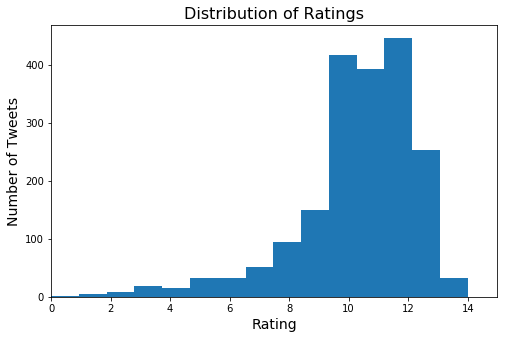

In [117]:

we_rate_dogs['rating'].plot(kind = 'hist', bins = 15)
plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

In [118]:
rating_10up_total = sum(we_rate_dogs.rating >= 10)
rating_10up_perc = round(rating_10up_total * 100 / we_rate_dogs.shape[0])
print("Number of tweets with rating 10+:  {}".format(rating_10up_total))
print("Percentage of tweets:                {}%".format(round(rating_10up_perc, 3)))

Number of tweets with rating 10+:  1541
Percentage of tweets:                79%


In [119]:
sum(we_rate_dogs.favorite_count <= we_rate_dogs.retweet_count)

0

In [120]:
we_rate_dogs.sort_values(by = 'favorite_count', ascending = False).head(5)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stage,source,text
306,822872901745569793,2017-01-21 18:26:02,13,42856.0,130824.0,Lakeland_terrier,19,None,puppo,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...
395,807106840509214720,2016-12-09 06:17:20,13,55432.0,118454.0,Chihuahua,50,Stephan,none,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...
108,866450705531457537,2017-05-22 00:28:40,13,32298.0,114537.0,French_bulldog,90,Jamesy,pupper,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...
58,879415818425184262,2017-06-26 19:07:24,13,39862.0,97666.0,English_springer,38,Duddles,none,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...
329,819004803107983360,2017-01-11 02:15:36,14,36713.0,86706.0,standard_poodle,35,Bo,doggo,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...


In [121]:
we_rate_dogs.stage.value_counts()

none       1651
pupper      200
doggo        71
puppo        23
floofer       8
Name: stage, dtype: int64

In [122]:
with_stage_sum = sum(we_rate_dogs.stage != 'none')
tweets_with_stage = round(with_stage_sum * 100 / we_rate_dogs.shape[0])
print("Number of tweets WITH stage:  {}".format(with_stage_sum))
print("Percentage of tweets:          {}%".format(round(tweets_with_stage, 3)))

Number of tweets WITH stage:  302
Percentage of tweets:          15%


In [123]:
str = "Number of tweets with 'none' predicted breed:  {} ({}%)"
none_count = sum(we_rate_dogs.breed == 'none')
none_perc = none_count * 100 / we_rate_dogs.shape[0]
print(str.format(none_count, round(none_perc)))

str = "Number of distinct breeds:  {}"
print(str.format(len(we_rate_dogs.breed.unique())))

Number of tweets with 'none' predicted breed:  302 (15%)
Number of distinct breeds:  113


In [124]:
top10_breeds_count = \
we_rate_dogs[we_rate_dogs.breed != 'none'].breed.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / we_rate_dogs.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))

Breed and number of tweets
--------------------------
golden_retriever      154
Labrador_retriever    103
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   47
Samoyed                42
Pomeranian             40
malamute               33
Name: breed, dtype: int64

Top 10 dog breeds make up 37% of all tweets


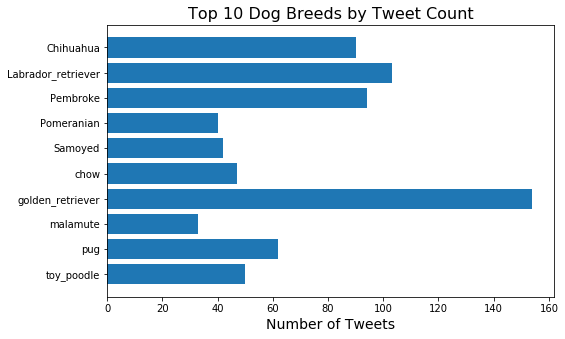

In [125]:
plt.barh(top10_breeds_count.index, top10_breeds_count)

plt.xlabel('Number of Tweets', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();